## Text Mining of News of Midterm Election 
### the news are fetched using NewsAPI, including 146 media, 820 news report from 2018-09-28 to 2018-11-07

In [1]:
import pandas as pd
import numpy as np

## Import data

In [9]:
df=pd.read_csv('cleaned_news_data_final.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 10 columns):
author             835 non-null object
content            1001 non-null object
description        1016 non-null object
publishedAt        1020 non-null object
source             1020 non-null object
title              1020 non-null object
url                1020 non-null object
urlToImage         997 non-null object
time_of_publish    1020 non-null object
date_of_publish    1020 non-null object
dtypes: object(10)
memory usage: 79.8+ KB


In [5]:
#df.drop_duplicates(keep=False, inplace=True)

In [11]:
df.head(10)

,author,content,description,publishedAt,source,title,url,urlToImage,time_of_publish,date_of_publish
0,Kris Holt,The November hearing will cover issues includi...,"A video still taken from the ad, which feature...",2018-09-28T18:57:00Z,Engadget,Why Trump Is Absent From His Own TV Ad,https://www.engadget.com/2018/09/28/google-ceo...,https://o.aolcdn.com/images/dims?thumbnail=120...,2018-09-28 18:57:00,2018-09-28
1,EMILY YELLIN,I have heard that for every person who talks a...,Of the money given by health-care political ac...,2018-09-28T01:48:39Z,The New York Times,Health-Care Companies Pour $46.7 Million Into ...,https://www.nytimes.com/2018/09/27/opinion/bla...,https://static01.nyt.com/images/2018/09/27/opi...,2018-09-28 01:48:39,2018-09-28
2,NaN,President Trump on Friday signed a massive spe...,Americans are confident local poll workers wil...,2018-09-28T17:17:16Z,The Washington Post,Most Americans are not confident election syst...,https://www.washingtonpost.com/business/econom...,https://www.washingtonpost.com/resizer/owR9MSO...,2018-09-28 17:17:16,2018-09-28
3,TIME Staff,Three TIME journalists will take part in the 2...,The president fans the flames of fear and ange...,2018-09-28T15:50:28Z,Time,Outside the Box: President Trump wants you and...,http://time.com/5409951/time-texas-tribune-fes...,https://timedotcom.files.wordpress.com/2018/08...,2018-09-28 15:50:28,2018-09-28
4,The Associated Press,The two countries that the United States has a...,"Dressing as ‘Brexit’, ‘Trump’ or even the ‘dea...",2018-09-28T07:16:23Z,ABC News,Why topical Halloween costumes are frightening...,https://abcnews.go.com/US/wireStory/china-russ...,https://s.abcnews.com/images/US/WireAP_cfc88fa...,2018-09-28 07:16:23,2018-09-28
5,"Associated Press, Marcy Gordon, Associated Press",The facade of the Capitol building in Washingt...,Obama's visit coincides with questions with al...,2018-09-28T00:53:47Z,USA Today,Midterm elections 2018: Former President Barac...,https://www.usatoday.com/story/news/politics/2...,https://www.gannett-cdn.com/-mm-/8fcc3d3e30642...,2018-09-28 00:53:47,2018-09-28
6,"USA TODAY, Jessica Guynn, USA TODAY","Google CEO Sundar Pichai, seen here delivering...",Remarks by Jody Hice come after Trump praised ...,2018-09-28T18:51:47Z,USA Today,Republican congressman: time to 'body-slam' De...,https://www.usatoday.com/story/tech/2018/09/28...,https://www.gannett-cdn.com/-mm-/8561554c31de4...,2018-09-28 18:51:47,2018-09-28
7,Kurt Wagner,Hackers may have accessed as many as 50 millio...,The contentious midterm campaign has barreled ...,2018-09-28T17:20:50Z,Recode,Capitol Report: Midterm campaigns barrel forwa...,https://www.recode.net/2018/9/28/17914538/face...,https://cdn.vox-cdn.com/thumbor/1fgo4pRreu3iXP...,2018-09-28 17:20:50,2018-09-28
8,NaN,The fate of Donald Trumps nominee for the Supr...,Angela Merkel told her conservative party on M...,2018-09-28T07:49:00Z,Yahoo.com,Angela Merkel Will Reportedly Quit Party Leade...,https://www.yahoo.com/news/brett-kavanaugh-sup...,https://s.yimg.com/uu/api/res/1.2/3lv_X2rdZQik...,2018-09-28 07:49:00,2018-09-28
9,Shaun Nichols,Hackers probing America's electronic voting sy...,CNN Stacey Abrams: The Deep South woman vying ...,2018-09-28T01:04:09Z,Theregister.co.uk,Stacey Abrams: The Deep South woman vying to m...,https://www.theregister.co.uk/2018/09/28/defco...,https://regmedia.co.uk/2017/04/12/voting_shutt...,2018-09-28 01:04:09,2018-09-28


In [12]:
# look for how many news agencies
df['source'].nunique()

146

In [15]:
df['description'][0]

'A video still taken from the ad, which features images that speak to the financial considerations that drive middle-class families’ lives, such as the ability to afford a home.'

In [16]:
df['title'][0]

'Why Trump Is Absent From His Own TV Ad'

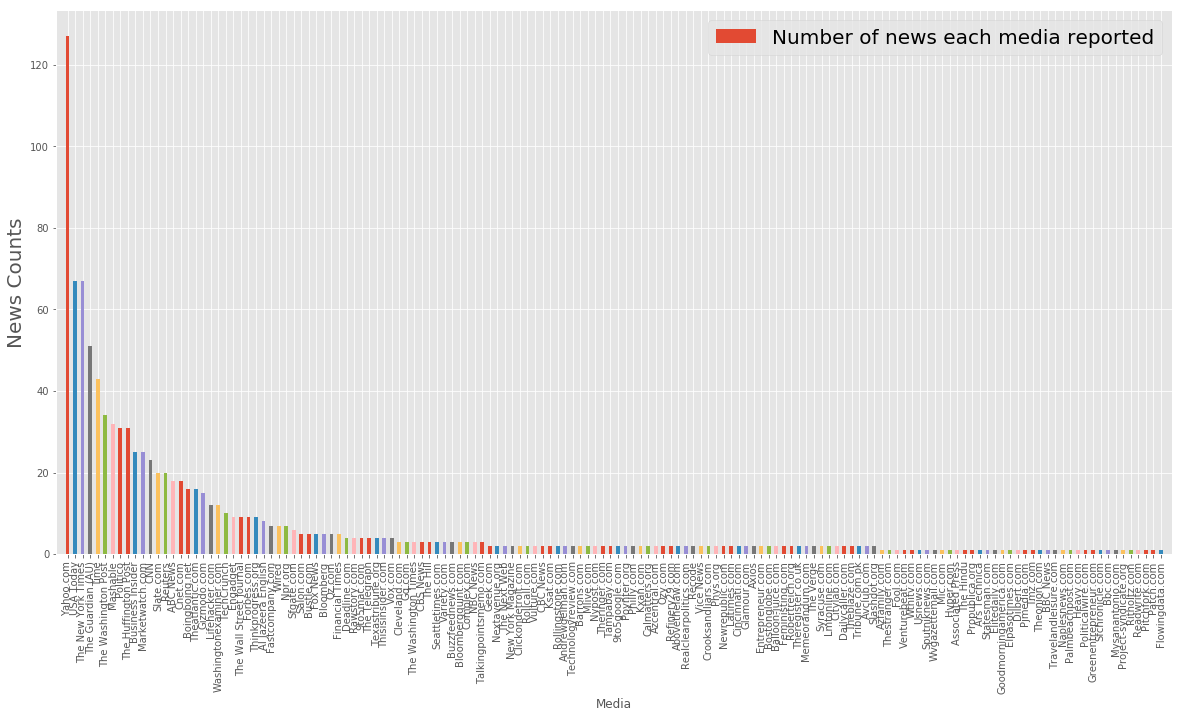

In [17]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# plot how many news related to midterm election reported by each medium over past 31 days
h=df['source'].value_counts().plot(kind='bar',align='center',label='publisher',width=0.5,figsize=(20,10))
x0, x1 = h.get_xlim()
h.set_xlim(x0 -1, x1 + 1)
h.legend(['Number of news each media reported'],loc='best', fontsize=20)
plt.xlabel('Media', fontdict=None, labelpad=None)
plt.ylabel('News Counts', fontdict=None, labelpad=None,fontsize=20)
h.tick_params(axis = 'both',labelsize = 10)
plt.savefig('Fig1_Media_NewsCount.png')

In [18]:
df_media=df['source'].value_counts().sort_values(ascending=False)

In [19]:
df_media[0:20]

Yahoo.com              127
USA Today               67
The New York Times      67
The Guardian (AU)       51
Time                    43
The Washington Post     34
Mashable                32
The Huffington Post     31
Politico                31
Business Insider        25
Marketwatch.com         25
CNN                     23
Slate.com               20
Reuters                 20
ABC News                18
Cnet.com                18
Theatlantic.com         16
Boingboing.net          16
Gizmodo.com             15
Lifehacker.com          12
Name: source, dtype: int64

In [21]:
sum(df_media[0:20])

691

In [22]:
top_20_media=df_media.index[0:20].values

In [23]:
top_20_media

array(['Yahoo.com', 'USA Today', 'The New York Times',
       'The Guardian (AU)', 'Time', 'The Washington Post', 'Mashable',
       'The Huffington Post', 'Politico', 'Business Insider',
       'Marketwatch.com', 'CNN', 'Slate.com', 'Reuters', 'ABC News',
       'Cnet.com', 'Theatlantic.com', 'Boingboing.net', 'Gizmodo.com',
       'Lifehacker.com'], dtype=object)

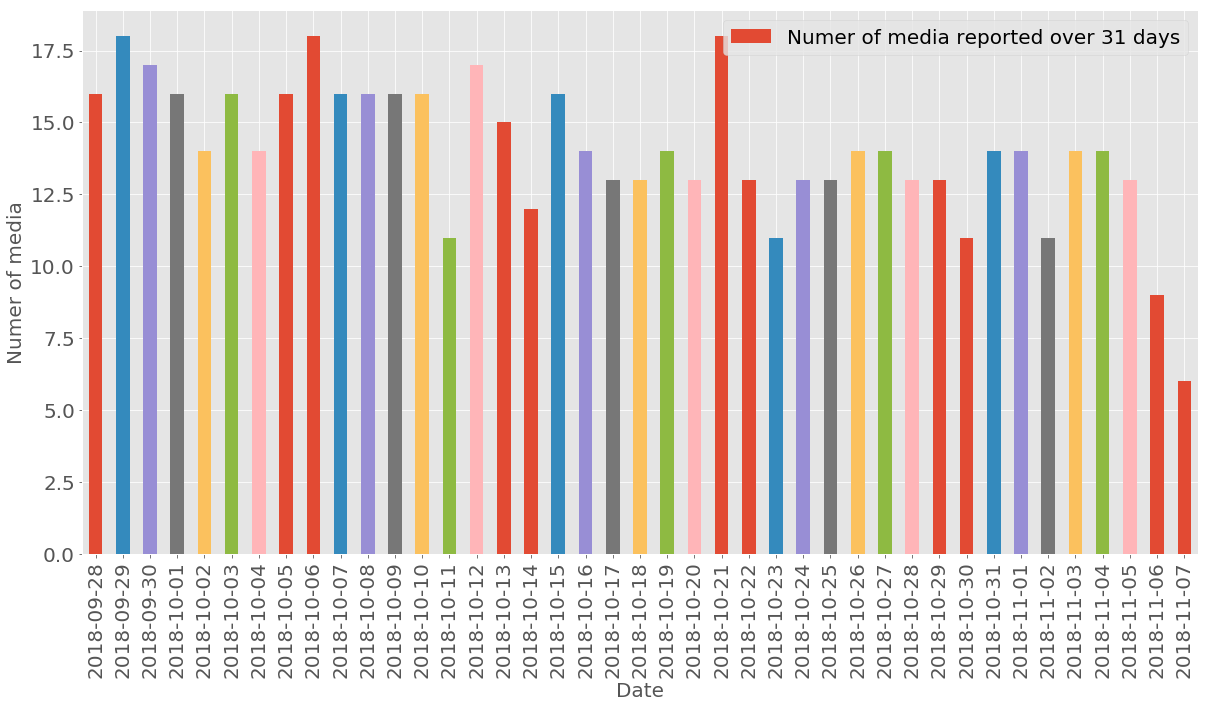

In [24]:

f2=df[['source','date_of_publish']].groupby(['date_of_publish'])['source'].nunique().plot.bar(align='center',figsize=(20,10))
f2.legend(['Numer of media reported over 31 days'],loc='best', fontsize=20)
plt.xlabel('Date', fontdict=None, labelpad=None, fontsize=20)
plt.ylabel('Numer of media', fontdict=None, labelpad=None,fontsize=20)
f2.tick_params(axis = 'both',labelsize = 20)
plt.savefig('Fig2_MediaReportsCounts.png')

In [25]:
df=df.dropna(subset=['description'])

In [25]:
content=df['content'].values
title=df['title'].values
description=df['description'].values

In [19]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jenny\AppData\Roaming\nltk_data...


True

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia

C:\Users\jenny\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [27]:
df['title score']=df['title'].apply(lambda x:sia().polarity_scores(x))
df['description score']=df['description'].apply(lambda x:sia().polarity_scores(x))

In [28]:
df['title polar_score']=df['title score'].apply(lambda x: x['compound'])
df['description polar_score']=df['description score'].apply(lambda x: x['compound'])

In [29]:
df['title polar_score']=df['title polar_score'].apply(lambda x:1 if x > 0.2 else x)

In [30]:
df['title polar_score']=df['title polar_score'].apply(lambda x:-1 if x < -0.2 else x)

In [31]:
df['title polar_score']=df['title polar_score'].apply(lambda x:0 if (x >= -0.2) & (x <= 0.2) else x)

In [32]:
df['description polar_score']=df['description polar_score'].apply(lambda x:1 if x > 0.2 else x)
df['description polar_score']=df['description polar_score'].apply(lambda x:-1 if x < -0.2 else x)
df['description polar_score']=df['description polar_score'].apply(lambda x:0 if (x >= -0.2)& (x <= 0.2) else x) 

In [34]:
df.head(10)

,author,content,description,publishedAt,source,title,url,urlToImage,time_of_publish,date_of_publish,title score,description score,title polar_score,description polar_score
0,Kris Holt,The November hearing will cover issues includi...,"A video still taken from the ad, which feature...",2018-09-28T18:57:00Z,Engadget,Why Trump Is Absent From His Own TV Ad,https://www.engadget.com/2018/09/28/google-ceo...,https://o.aolcdn.com/images/dims?thumbnail=120...,2018-09-28 18:57:00,2018-09-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp...",0.0,1.0
1,EMILY YELLIN,I have heard that for every person who talks a...,Of the money given by health-care political ac...,2018-09-28T01:48:39Z,The New York Times,Health-Care Companies Pour $46.7 Million Into ...,https://www.nytimes.com/2018/09/27/opinion/bla...,https://static01.nyt.com/images/2018/09/27/opi...,2018-09-28 01:48:39,2018-09-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0
2,NaN,President Trump on Friday signed a massive spe...,Americans are confident local poll workers wil...,2018-09-28T17:17:16Z,The Washington Post,Most Americans are not confident election syst...,https://www.washingtonpost.com/business/econom...,https://www.washingtonpost.com/resizer/owR9MSO...,2018-09-28 17:17:16,2018-09-28,"{'neg': 0.164, 'neu': 0.686, 'pos': 0.15, 'com...","{'neg': 0.109, 'neu': 0.761, 'pos': 0.13, 'com...",0.0,0.0
3,TIME Staff,Three TIME journalists will take part in the 2...,The president fans the flames of fear and ange...,2018-09-28T15:50:28Z,Time,Outside the Box: President Trump wants you and...,http://time.com/5409951/time-texas-tribune-fes...,https://timedotcom.files.wordpress.com/2018/08...,2018-09-28 15:50:28,2018-09-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'comp...",0.0,-1.0
4,The Associated Press,The two countries that the United States has a...,"Dressing as ‘Brexit’, ‘Trump’ or even the ‘dea...",2018-09-28T07:16:23Z,ABC News,Why topical Halloween costumes are frightening...,https://abcnews.go.com/US/wireStory/china-russ...,https://s.abcnews.com/images/US/WireAP_cfc88fa...,2018-09-28 07:16:23,2018-09-28,"{'neg': 0.537, 'neu': 0.463, 'pos': 0.0, 'comp...","{'neg': 0.141, 'neu': 0.698, 'pos': 0.16, 'com...",-1.0,0.0
5,"Associated Press, Marcy Gordon, Associated Press",The facade of the Capitol building in Washingt...,Obama's visit coincides with questions with al...,2018-09-28T00:53:47Z,USA Today,Midterm elections 2018: Former President Barac...,https://www.usatoday.com/story/news/politics/2...,https://www.gannett-cdn.com/-mm-/8fcc3d3e30642...,2018-09-28 00:53:47,2018-09-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0
6,"USA TODAY, Jessica Guynn, USA TODAY","Google CEO Sundar Pichai, seen here delivering...",Remarks by Jody Hice come after Trump praised ...,2018-09-28T18:51:47Z,USA Today,Republican congressman: time to 'body-slam' De...,https://www.usatoday.com/story/tech/2018/09/28...,https://www.gannett-cdn.com/-mm-/8561554c31de4...,2018-09-28 18:51:47,2018-09-28,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...","{'neg': 0.093, 'neu': 0.829, 'pos': 0.078, 'co...",1.0,0.0
7,Kurt Wagner,Hackers may have accessed as many as 50 millio...,The contentious midterm campaign has barreled ...,2018-09-28T17:20:50Z,Recode,Capitol Report: Midterm campaigns barrel forwa...,https://www.recode.net/2018/9/28/17914538/face...,https://cdn.vox-cdn.com/thumbor/1fgo4pRreu3iXP...,2018-09-28 17:20:50,2018-09-28,"{'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'compou...","{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'comp...",-1.0,-1.0
8,NaN,The fate of Donald Trumps nominee for the Supr...,Angela Merkel told her conservative party on M...,2018-09-28T07:49:00Z,Yahoo.com,Angela Merkel Will Reportedly Quit Party Leade...,https://www.yahoo.com/news/brett-kavanaugh-sup...,https://s.yimg.

In [35]:
df_pos=df[df['description polar_score']==1]

In [36]:
df_description_pos=df_pos['description'].values

In [37]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

In [38]:
import nltk
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [39]:
pos_tokens=process_text(df_description_pos)
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common(20)

[('midterm', 156),
 ('election', 140),
 ('trump', 114),
 ('elections', 114),
 ('president', 74),
 ('democrats', 60),
 ('washington', 47),
 ('post', 47),
 ('news', 46),
 ('donald', 45),
 ('day', 45),
 ('get', 43),
 ('voters', 43),
 ('vote', 43),
 ('new', 41),
 ('tuesday', 41),
 ('party', 39),
 ('democratic', 38),
 ('people', 37),
 ('house', 34)]

In [41]:
df_description_neg=df[df['description polar_score'] == -1]['description'].values

In [42]:
neg_tokens=process_text(df_description_neg)
neg_freq = nltk.FreqDist(neg_tokens)
neg_freq.most_common(20)

[('midterm', 122),
 ('election', 92),
 ('elections', 81),
 ('trump', 78),
 ('president', 45),
 ('donald', 44),
 ('voters', 39),
 ('voting', 37),
 ('campaign', 34),
 ('us', 29),
 ('state', 29),
 ('u', 28),
 ('political', 28),
 ('new', 27),
 ('republicans', 26),
 ('2018', 26),
 ('voter', 26),
 ('tuesday', 25),
 ('stocks', 25),
 ('washington', 24)]

In [43]:
df_show=df[['title','description','source','title polar_score','description polar_score']]

In [44]:
df_show.head(10)

,title,description,source,title polar_score,description polar_score
0,Why Trump Is Absent From His Own TV Ad,"A video still taken from the ad, which feature...",Engadget,0.0,1.0
1,Health-Care Companies Pour $46.7 Million Into ...,Of the money given by health-care political ac...,The New York Times,0.0,0.0
2,Most Americans are not confident election syst...,Americans are confident local poll workers wil...,The Washington Post,0.0,0.0
3,Outside the Box: President Trump wants you and...,The president fans the flames of fear and ange...,Time,0.0,-1.0
4,Why topical Halloween costumes are frightening...,"Dressing as ‘Brexit’, ‘Trump’ or even the ‘dea...",ABC News,-1.0,0.0
5,Midterm elections 2018: Former President Barac...,Obama's visit coincides with questions with al...,USA Today,0.0,0.0
6,Republican congressman: time to 'body-slam' De...,Remarks by Jody Hice come after Trump praised ...,USA Today,1.0,0.0
7,Capitol Report: Midterm campaigns barrel forwa...,The contentious midterm campaign has barreled ...,Recode,-1.0,-1.0
8,Angela Merkel Will Reportedly Quit Party Leade...,Angela Merkel told her conservative party on M...,Yahoo.com,0.0,1.0
9,Stacey Abrams: The Deep South woman vying to m...,CNN Stacey Abrams: The Deep South woman vying ...,Theregister.co.uk,0.0,-1.0


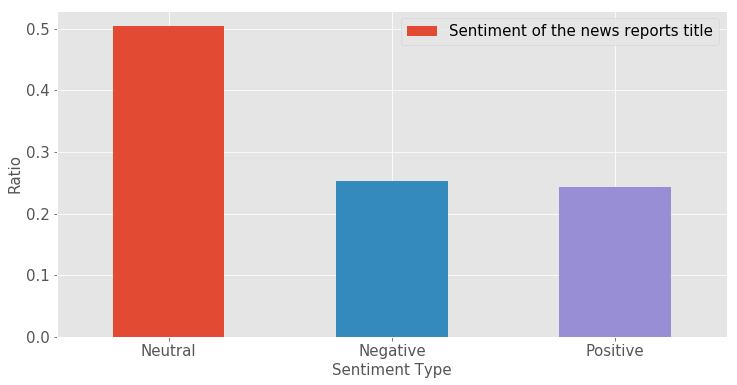

In [46]:
fig, ax = plt.subplots(figsize=(12, 6))
f3=df['title polar_score'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(['Neutral', 'Negative', 'Positive'],rotation='horizontal')
f3.legend(['Sentiment of the news reports title'],loc='best', fontsize=15)
plt.xlabel('Sentiment Type', fontdict=None, labelpad=None, fontsize=15, rotation='horizontal')
plt.ylabel('Ratio', fontdict=None, labelpad=None,fontsize=15)
f3.tick_params(axis = 'both',labelsize = 15)
plt.savefig('Fig3_TitleSentiment.png')

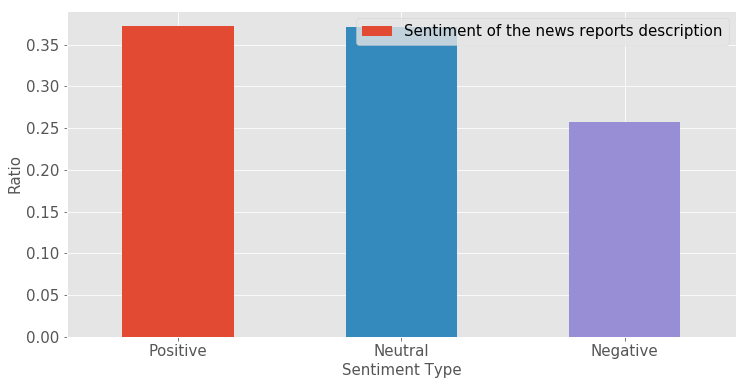

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))
f4=df['description polar_score'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(['Positive', 'Neutral', 'Negative'],rotation='horizontal')
f4.legend(['Sentiment of the news reports description'],loc='best', fontsize=15)
plt.xlabel('Sentiment Type', fontdict=None, labelpad=None, fontsize=15, rotation='horizontal')
plt.ylabel('Ratio', fontdict=None, labelpad=None,fontsize=15)
f4.tick_params(axis = 'both',labelsize = 15)
plt.savefig('Fig3_DescriptionSentiment.png')

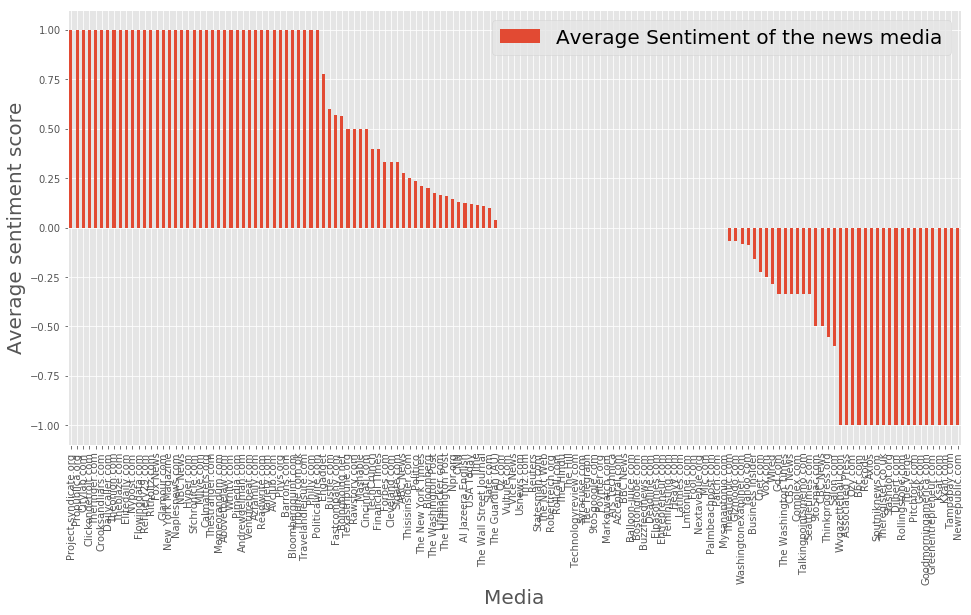

In [50]:
f5=df[['source','description polar_score']].groupby(['source']).mean().sort_values(by=['description polar_score'], ascending=False).plot(kind='bar', align='center',label='publisher',width=0.5,figsize=(16,8))
f5.legend(['Average Sentiment of the news media'],loc='best', fontsize=20)
plt.xlabel('Media', fontdict=None, labelpad=None, fontsize=20, rotation='horizontal')
plt.ylabel('Average sentiment score', fontdict=None, labelpad=None,fontsize=20)
f3.tick_params(axis = 'both',labelsize = 15)
plt.savefig('Fig5_MediaSentiment.png')

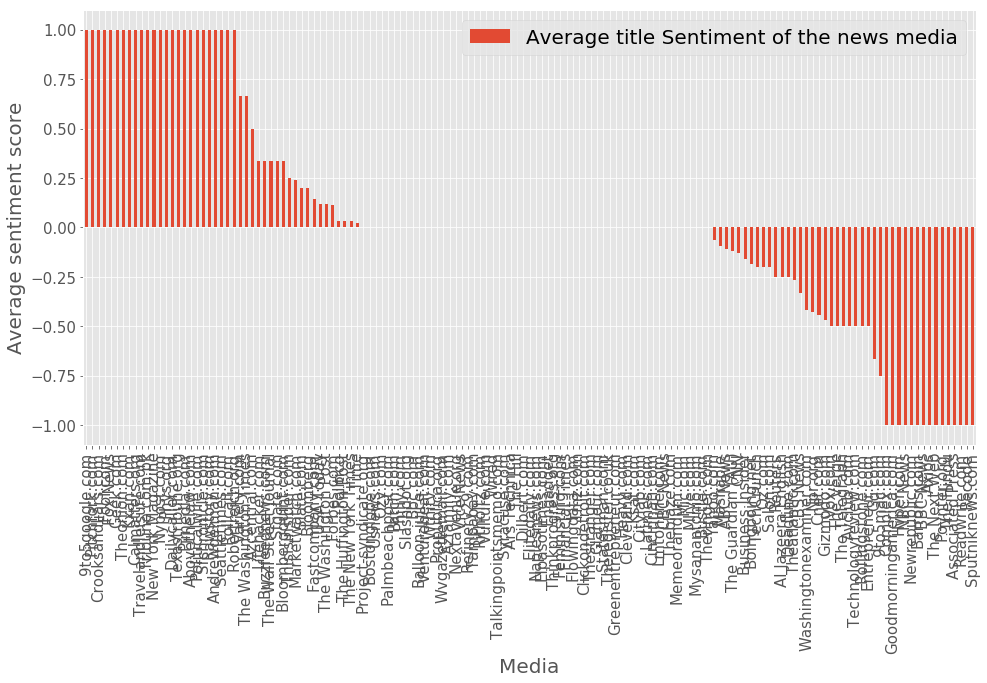

In [62]:
f6=df[['source','title polar_score']].groupby(['source']).mean().sort_values(by=['title polar_score'], ascending=False).plot(kind='bar', align='center',label='publisher',width=0.5,figsize=(16,8))
f6.legend(['Average title Sentiment of the news media'],loc='best', fontsize=20)
plt.xlabel('Media', fontdict=None, labelpad=None, fontsize=20, rotation='horizontal')
plt.ylabel('Average sentiment score', fontdict=None, labelpad=None,fontsize=20)
f6.tick_params(axis = 'both',labelsize = 15)
plt.savefig('Fig6_MediaSentimentTitle.png')

In [52]:
df_description_mean=df[['source','description polar_score']].groupby(['source']).mean()

In [53]:
df_descritiopn_neutral=df_description_mean[(df_description_mean['description polar_score'] <= 0.2)&(df_description_mean['description polar_score'] >= -0.2)].count()

In [54]:
df_description_mean.ix[top_20_media]

C:\Users\jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,description polar_score
source,
Yahoo.com,-0.086614
USA Today,0.119403
The New York Times,0.208955
The Guardian (AU),0.039216
Time,0.116279
The Washington Post,0.176471
Mashable,0.500000
The Huffington Post,0.161290
Politico,0.233333


In [63]:
df_title_mean=df[['source','title polar_score']].groupby(['source']).mean()

In [64]:
df_title_mean.ix[top_20_media]

C:\Users\jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,title polar_score
source,
Yahoo.com,-0.062992
USA Today,0.119403
The New York Times,0.029851
The Guardian (AU),-0.117647
Time,0.023256
The Washington Post,0.117647
Mashable,-0.093750
The Huffington Post,0.032258
Politico,0.033333


In [68]:

import statistics 

statistics.stdev(df_title_mean.ix[top_20_media]['title polar_score'])

C:\Users\jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


0.21007491647053916

In [72]:
sum(df_title_mean.ix[top_20_media]['title polar_score'])/20

C:\Users\jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


-0.058106576050113434

In [73]:
sum(df_description_mean.ix[top_20_media]['description polar_score'])/20

C:\Users\jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0.1095078353707843

In [70]:
statistics.stdev(df_description_mean.ix[top_20_media]['description polar_score'])

C:\Users\jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0.19661222663323996

In [69]:
df_title_mean.ix['Fox News']

C:\Users\jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


title polar_score    1.0
Name: Fox News, dtype: float64

In [56]:
df_descritiopn_neutral

description polar_score    54
dtype: int64

In [58]:
df_description_negative=df_description_mean[df_description_mean['description polar_score'] < -0.2].count()

In [159]:
df_description_negative

description compound    37
dtype: int64

In [59]:
df_description_positive=df_description_mean[df_description_mean['description polar_score'] > 0.2].count()

In [60]:
df_description_positive

description polar_score    58
dtype: int64

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
vectorizer=TfidfVectorizer(stop_words='english',max_features=6000)

In [169]:
vectors_decription_train=vectorizer.fit_transform(description).toarray()

In [170]:
words = vectorizer.get_feature_names()

In [247]:
from sklearn.cluster import KMeans

from sklearn import metrics
from scipy.spatial.distance import cdist

distortions=[]

K=range(1,15)

for k in K:
    kmeans = KMeans(n_clusters=k)

    kmeans.fit(vectors_decription_train)

    distortions.append(sum(np.min(cdist(vectors_decription_train,kmeans.cluster_centers_,'euclidean'),axis=1))/vectors_decription_train.shape[0])


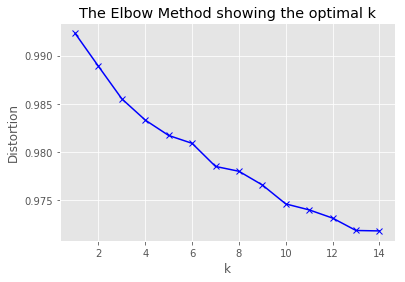

In [257]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('Fig6_elbow.png')

In [209]:
print ("cluster centers:")
print (kmeans.cluster_centers_.shape)

cluster centers:
(13, 4447)


In [249]:
kmeans_5 = KMeans(n_clusters=5)

kmeans_5.fit(vectors_decription_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [250]:
n_feat = 10
top_centroids = kmeans_5.cluster_centers_.argsort()[:,-1:-n_feat:-1]

In [251]:
print ("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print ( "%d: %s" % (num, ", ".join(words[i] for i in centroid)))

top features for each cluster:
0: election, political, 2016, midterms, facebook, state, 2018, media, social
1: kavanaugh, brett, court, supreme, confirmation, nomination, nominee, judge, trump
2: midterm, vote, elections, voting, people, early, texas, election, 2018
3: trump, president, donald, washington, campaign, midterm, post, election, elections
4: democrats, midterm, news, new, house, elections, election, party, republicans


In [252]:
kmeans_10 = KMeans(n_clusters=10)

kmeans_10.fit(vectors_decription_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [253]:
n_feat = 10
top_centroids = kmeans_10.cluster_centers_.argsort()[:,-1:-n_feat:-1]

In [254]:
print ("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print ( "%d: %s" % (num, ", ".join(words[i] for i in centroid)))

top features for each cluster:
0: house, senate, said, republicans, control, battle, midterm, democrats, elections
1: election, midterm, vote, november, polls, trump, americans, day, voters
2: democratic, midterms, groups, key, republican, russian, role, money, 2020
3: washington, post, examiner, trump, midterm, democrats, elections, president, republicans
4: president, trump, donald, campaign, midterm, elections, rally, vice, immigration
5: voting, early, midterm, million, texas, states, elections, machines, turnout
6: kavanaugh, brett, supreme, court, nomination, nominee, confirmation, judge, washington
7: political, democrats, elections, midterm, gop, party, election, women, vote
8: new, news, york, poll, times, midterm, elections, election, today
9: 2018, voter, midterm, election, elections, georgia, just, vote, turnout


In [210]:
n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n_feat:-1]

In [211]:
print ("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print ( "%d: %s" % (num, ", ".join(words[i] for i in centroid)))

top features for each cluster:
0: house, don, white, senate, trump, election, republicans, counsel, left
1: election, midterm, democrats, news, elections, control, congress, day, new
2: georgia, democratic, candidate, kemp, state, abrams, brian, secretary, campaign
3: election, midterm, 2018, security, results, national, just, comes, night
4: president, trump, donald, midterm, campaign, elections, rally, republicans, election
5: today, opinion, usa, asked, good, bring, politics, elections, huffpost
6: vote, elections, midterm, 2018, party, voters, month, upcoming, midterms
7: border, migrants, caravan, central, american, president, trump, donald, mexico
8: kavanaugh, brett, supreme, court, confirmation, nominee, nomination, judge, trump
9: texas, obama, cruz, ted, beto, rourke, austin, barack, people
10: news, fox, conservative, support, florida, governor, election, bid, gop
11: washington, post, midterm, examiner, democrats, elections, trump, president, government
12: york, times, new

In [212]:
assigned_cluster = kmeans.predict(vectors_decription_train)

In [213]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_decription_train.shape[0])[assigned_cluster==i]
    sample_description = np.random.choice(cluster, 2, replace=False)
    print("Cluster %d:" % i)
    for review_index in sample_description:
        print("%s - " % df.iloc[review_index]['description'])
        


Cluster 0:
After years of political silence, the singer went public with a big statement. - 
A large part of parenting is trying to raise our kids to be good citizens. We give them chores to teach them to contribute to the work of the household, we take them to volunteer to get them involved in their community, and we model kindness and respect to th… - 
Cluster 1:
Iceage, Superchunk, Iron & Wine, Toro Y Moi, Fucked Up, and others join the #iVoted initiative - 
Republican Bob Hugin, a former pharmaceuticals CEO running for US Senate in New Jersey, was the first target of the political action committee.  One TV ad accuses a Democrat of “supporting drug company greed over our needs”.  Another accuses a Republican of “… - 
Cluster 2:
The campaign of Stacey Abrams, the Democratic candidate in Georgia's - 
It doesn't take a hacker to mess with voting machines. Sometimes the problem comes from within. - 
Cluster 3:
CNN's Harry Enten helps you navigate The Forecast using a vast amount of poll

In [223]:
import numpy as np

# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[:n]]


In [225]:
vectors_decription_pos=vectorizer.fit_transform(df_description_pos).toarray()
word_pos=vectorizer.get_feature_names()

In [226]:
avg = np.sum(vectors_decription_pos, axis=0) 
print("top 20 by average tf-idf")
print(get_top_values(avg, 20, word_pos))


top 20 by average tf-idf
['midterm', 'trump', 'elections', 'election', 'president', 'democrats', 'washington', 'donald', 'vote', 'news', 'new', 'house', 'post', 'voters', 'kavanaugh', 'party', 'republicans', 'court', 'republican', 'senate']


In [231]:
vectors_decription_neg=vectorizer.fit_transform(df_description_neg).toarray()
word_neg=vectorizer.get_feature_names()

In [232]:
avg = np.sum(vectors_decription_neg, axis=0) 
print("top 20 by average tf-idf")
print(get_top_values(avg, 20, word_neg))


top 20 by average tf-idf
['midterm', 'trump', 'elections', 'election', 'president', 'donald', 'washington', 'kavanaugh', 'republicans', 'democrats', 'voters', 'political', 'senate', 'new', 'week', 'post', '2018', 'voting', 'campaign', 'voter']
